In [90]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 


In [91]:
#Se lee el dataset que usaremos
ruta = "C:/Users/becar/OneDrive/Escritorio/Mineria de Datos/BECC1927439-MineriaDeDatos/mls_salaries_masterlist.csv"
data = pd.read_csv(ruta)



df = pd.DataFrame(data) 
df

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern
...,...,...,...,...,...,...,...,...
10368,Vancouver Whitecaps,Scoaupssa e Silva,Caio Alexand,M,500000.0,562500.00,2022,Western
10369,Vancouver Whitecaps,Tceaibpesrt,Russell,M,400000.0,449375.00,2022,Western
10370,Vancouver Whitecaps,Vceaspeslinovic,Ranko,D,405000.0,490500.00,2022,Western
10371,Vancouver Whitecaps,Vcitaeps,Pedro,M,556000.0,609997.00,2022,Western


In [78]:
#Se eliminan los datos NA
#df.isna().sum()
#df.shape
#df = df.dropna()
#df.shape

(9382, 8)

In [92]:
df.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern


In [107]:
df[['club', 'base_salary', 'guaranteed_compensation']].head()

,club,base_salary,guaranteed_compensation
0,Vancouver Whitecaps,46500.0,46500.00
1,FC Dallas,46500.0,70500.00
2,Vancouver Whitecaps,46500.0,51500.00
3,Toronto FC,46500.0,53166.67
4,New England Revolution,145000.0,175000.00


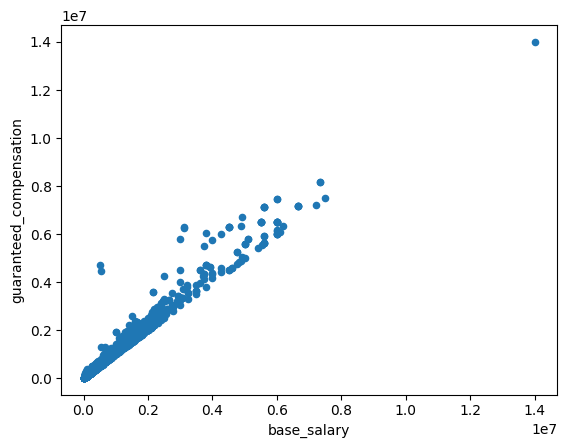

In [94]:
df.plot.scatter(x='base_salary', y='guaranteed_compensation')
plt.show()

In [96]:
#Hacemos una linea recta sobre los datos 
df['base_salary'].min()

12900.0

In [97]:
#Parametros de la recta 
w = 1
b = 0

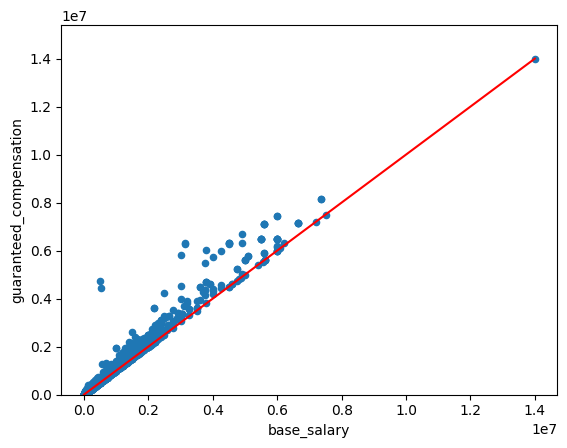

In [98]:
#Puntos en la recta 
x = np.linspace(0, df['base_salary'].max(), 100)
y = w*x+b

#Grafica 
df.plot.scatter(x='base_salary', y='guaranteed_compensation')
plt.plot(x, y, '-r')
plt.ylim(0, df['guaranteed_compensation'].max()*1.1)
#plt.grid()
plt.show()

In [99]:
#Calculo de las predicciones
df['pred'] = df['base_salary']*w+b

In [100]:
#Calculo de las funciones de error 
df['diff'] = df['pred'] - df['guaranteed_compensation']
df['cuad'] = df['diff']**2
df.head()

,club,last_name,first_name,position,base_salary,guaranteed_compensation,year,conference,pred,diff,cuad
0,Vancouver Whitecaps,Abdallah,Aminu,M,46500.0,46500.00,2013,Western,46500.0,0.00,0.000000e+00
1,FC Dallas,Acosta,Kellyn,M,46500.0,70500.00,2013,Western,46500.0,-24000.00,5.760000e+08
2,Vancouver Whitecaps,Adekugbe,Samuel,D,46500.0,51500.00,2013,Western,46500.0,-5000.00,2.500000e+07
3,Toronto FC,Agbossoumonde,Gale,D,46500.0,53166.67,2013,Eastern,46500.0,-6666.67,4.444449e+07
4,New England Revolution,Agudelo,Juan,F,145000.0,175000.00,2013,Eastern,145000.0,-30000.00,9.000000e+08


In [101]:
df['cuad'].mean()

17705462875.072163

In [102]:
#grid de la funcion de error basado en m, b=0
w = np.linspace(5, 20, 5)
grid_error = pd.DataFrame(w, columns =['w'])
grid_error.head()

,w
0,5.00
1,8.75
2,12.50
3,16.25
4,20.00


In [103]:
def sum_error(w, df):
    b=0
    df['pred'] = df['base_salary']*w+b
    df['diff'] = df['pred']-df['guaranteed_compensation']
    df['cuad'] = df['diff']**2
    return(df['cuad'].mean())

In [104]:
grid_error['error']=grid_error['w'].apply(lambda x: sum_error(x, df=df))
grid_error.head()

,w,error
0,5.00,6.671428e+12
1,8.75,2.573942e+13
2,12.50,5.722366e+13
3,16.25,1.011242e+14
4,20.00,1.574409e+14


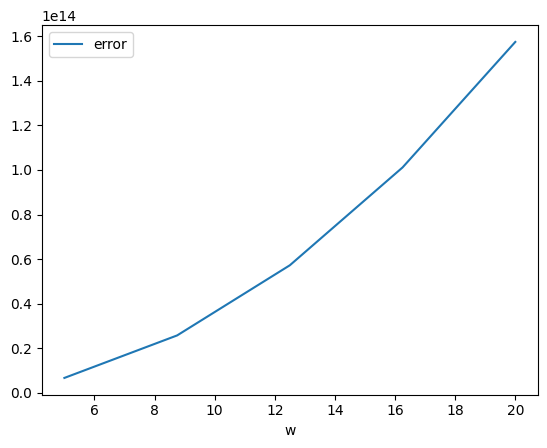

In [105]:
grid_error.plot(x='w',y='error')
plt.show()

In [106]:
# usando sklear para saber los valores optimos
from sklearn.linear_model import LinearRegression

# definiendo input y output
X_train = np.array(df['base_salary']).reshape((-1, 1))
Y_train = np.array(df['guaranteed_compensation'])

# creando modelo
model = LinearRegression(fit_intercept=False)
model.fit(X_train, Y_train)

# imprimiendo parametros
print(f"intercepto (b): {model.intercept_}")
print(f"pendiente (w): {model.coef_}")

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values